In [10]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [11]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)=mnist.load_data()

In [12]:
x_Train=x_train_image.reshape(60000,784).astype('float32')
x_Test=x_test_image.reshape(10000,784).astype('float32')

In [58]:
x_Train_normalize=x_Train/255
x_Test_normalize=x_Test/255

In [59]:
y_Train_OneHot=np_utils.to_categorical(y_train_label)
y_Test_OneHot=np_utils.to_categorical(y_test_label)

In [106]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model=Sequential()
model.add(Dense(units=1000,
                input_dim=784,#设置输入层神经元个数为784,设置隐藏层的个数为1000个
                kernel_initializer='normal',
                activation='relu'))
#units 神经单元个数,input_dim输入神经单元个数,activation激活函数为relu,使用normal distribution正态分布的随机数来初始化权重与偏差
model.add(Dropout(0.5))
#dense神经层的特色是所有的上一层与下一层的神经元都完全连接
model.add(Dense(units=1000,
               kernel_initializer='normal',
               activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10,#定义输出层神经元个数为10个
                kernel_initializer='normal',#使用normal distribution 正态分布的随机数来初始化weight与bias
                activation='softmax'))#定义激活函数为softmax,softmax可以将神经元的输出转换为预测每一个数字的概率

In [107]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [108]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [109]:
train_history=model.fit(x=x_Train_normalize,
                        y=y_Train_OneHot,
                       validation_split=0.2,
                       epochs=10,
                       batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 16s - loss: 0.3706 - acc: 0.8856 - val_loss: 0.1301 - val_acc: 0.9625
Epoch 2/10
 - 16s - loss: 0.1585 - acc: 0.9518 - val_loss: 0.1018 - val_acc: 0.9688
Epoch 3/10
 - 16s - loss: 0.1194 - acc: 0.9630 - val_loss: 0.0888 - val_acc: 0.9719
Epoch 4/10
 - 16s - loss: 0.0980 - acc: 0.9701 - val_loss: 0.0830 - val_acc: 0.9751
Epoch 5/10
 - 16s - loss: 0.0833 - acc: 0.9740 - val_loss: 0.0935 - val_acc: 0.9728
Epoch 6/10
 - 16s - loss: 0.0754 - acc: 0.9759 - val_loss: 0.0757 - val_acc: 0.9786
Epoch 7/10
 - 16s - loss: 0.0685 - acc: 0.9787 - val_loss: 0.0804 - val_acc: 0.9777
Epoch 8/10
 - 16s - loss: 0.0626 - acc: 0.9792 - val_loss: 0.0731 - val_acc: 0.9803
Epoch 9/10
 - 16s - loss: 0.0556 - acc: 0.9822 - val_loss: 0.0726 - val_acc: 0.9805
Epoch 10/10
 - 16s - loss: 0.0526 - acc: 0.9828 - val_loss: 0.0771 - val_acc: 0.9807


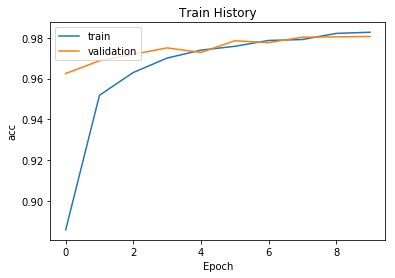

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()
show_train_history(train_history,'acc','val_acc')

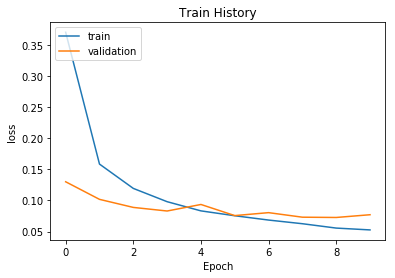

In [111]:
show_train_history(train_history,'loss','val_loss')

In [112]:
scores=model.evaluate(x_Test_normalize,y_Test_OneHot)
print()
print('accurcy=',scores[1])

10000/10000 [==============================] - 2s 195us/step

accurcy= 0.9821000099182129


In [67]:
prediction=model.predict_classes(x_Test)

In [94]:
prediction


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

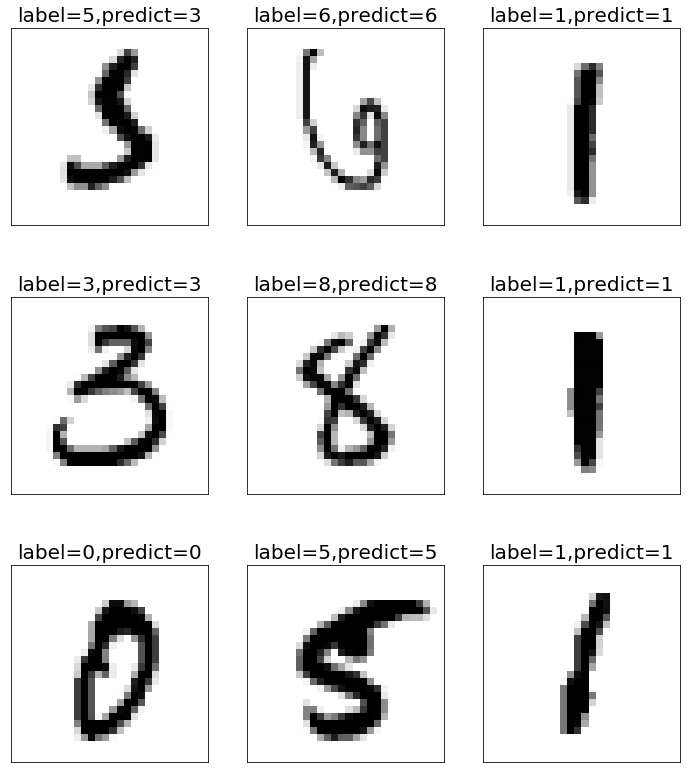

In [95]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=9):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:num=25
    for i in range(0,num):
        ax=plt.subplot(3,3,1+i)
        ax.imshow(images[idx],cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
        ax.set_title(title,fontsize=20)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
    plt.show()
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340)

In [96]:
import pandas as pd
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,973,0,2,2,0,0,1,0,1,1
1,0,1125,3,2,0,1,1,0,3,0
2,6,0,1005,6,1,0,4,5,5,0
3,0,0,1,996,0,2,0,3,4,4
4,3,0,0,1,947,1,5,3,2,20
5,6,0,0,14,1,858,6,0,5,2
6,4,3,1,1,1,3,945,0,0,0
7,1,5,11,6,0,0,0,993,1,11
8,5,0,4,8,3,1,3,2,945,3


In [83]:
df=pd.DataFrame({'label':y_test_label,'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [84]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1289,5,3
1393,5,3
2035,5,3
3117,5,3
3702,5,3
3902,5,3
4271,5,3
4300,5,3


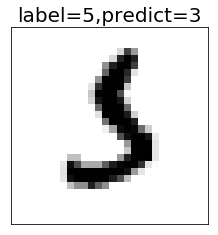

In [85]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340,num=1)